# Dataset

[Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

**Tabla de variables**
* acidez fija
* acidez volátil
* ácido cítrico
* cloruros de azúcar residuales
* dióxido de azufre libre
* dióxido de azufre total
* densidad
* pH
* sulfatos
* alcohol
*calidad

# Requerimientos

***1.	Limpieza de Datos:***
*	**Identificación y eliminación de valores duplicados:** Detectar y eliminar registros duplicados que puedan sesgar el análisis.
*	**Verificación y ajuste de tipos de datos:** Comprobar y ajustar los tipos de datos de cada columna (numérico o categórico), según sea necesario.
*	**Corrección de inconsistencias en valores categóricos:** Asegurarse de que los valores categóricos sean coherentes y estén estandarizados.
*	**Manejo de valores faltantes adecuadamente:** Imputar valores faltantes utilizando técnicas como la media, mediana o moda, según corresponda.

***2.	Exploración de Datos:***
*	**Visualizaciones univariadas y multivariadas:** Utilizar histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para comprender la distribución y las relaciones entre variables.
*	**Estadísticas descriptivas:** Calcular medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del conjunto de datos.

***3.	Implementación de Modelos:***
*	**Modelos de Clasificación:** Implementar modelos de clasificación como Regresión Logística y K-Nearest Neighbors (KNN).
*	**Evaluación de Modelos:** Evaluar los modelos utilizando métricas como accuracy, precisión, recall y F1-score.
*	**Comparación de Rendimiento:** Comparar los resultados de los modelos y discutir cuál es el más adecuado para este dataset.


----------------------------------------------
# **Paso 1 - Limpieza de Datos:**
----------------------------------------------

# Librerias

In [32]:
# Standard libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Kaggle utility
import kagglehub

# Scikit-learn utilities for building pipelines and transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scikit-learn for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, label_binarize
from sklearn.impute import SimpleImputer

# Scikit-learn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR

# Scikit-learn model selection tools
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Scikit-learn metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc

# Scikit-learn for multiclass strategies
from sklearn.multiclass import OneVsRestClassifier

# Identificación y eliminación de valores duplicados

In [33]:
! unzip wine+quality.zip

Archive:  wine+quality.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Cargar datos**

In [34]:
# Obtener una lista de los archivos CSV específicos
csv_files = ['winequality-red.csv', 'winequality-white.csv']

# Leer y almacenar los DataFrames en una lista
dfs = [pd.read_csv(file, sep=';') for file in csv_files]

# Concatenar los DataFrames en uno solo
data = pd.concat(dfs, ignore_index=True)

# Mostrar resultado
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [35]:
# Hacer una copia del Df original
df = data.copy()

In [36]:
# Informacion de Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [37]:
# Visualizar valos nulos
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [38]:
# Valores duplicados
print(f"Cantidad de datos duplicados: {df.duplicated().sum()}")

Cantidad de datos duplicados: 1179


In [39]:
# Eliminar datos duplicados
df = df.drop_duplicates()
print(f"Cantidad de datos duplicados: {df.duplicated().sum()}")

Cantidad de datos duplicados: 0


# Verificación y ajuste de tipos de datos

In [40]:
# Tipo de Columnas del DF
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [41]:
# Conversión a tipo categórico
df['quality'] = df['quality'].astype('category')

In [42]:
# Tipos de datos por columnas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"Columnas categóricas: {categorical_columns}")
print(f"Columnas numéricas: {numerical_columns}")

Columnas categóricas: ['quality']
Columnas numéricas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


# Corrección de inconsistencias en valores categóricos

In [43]:
# Verificación de valores únicos
print(df['quality'].unique())

[5, 6, 7, 4, 8, 3, 9]
Categories (7, int64): [3, 4, 5, 6, 7, 8, 9]


In [44]:
# Análisis de distribución
print(df['quality'].value_counts())

quality
6    2323
5    1751
7     855
4     206
8     148
3      30
9       5
Name: count, dtype: int64




```
# Los valores categóricos son coherentes y estan estandarizados
```



# Outliers

In [74]:
# Identificamos todas las columnas numéricas
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, num_columns)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 1094
Porcentaje de outliers: 20.57%


In [75]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (5318, 12)
Tamaño del DataFrame sin outliers: (4224, 12)


# Manejo de valores faltantes adecuadamente



```
"El manejo de los valores faltantes se va tratar en el antes del modelado para utilizar imputer y seguir un orden secuencial"
```



----------------------------------------------
# **Paso 2 - Exploración de Datos:**
----------------------------------------------

# Visualizaciones univariadas y multivariadas

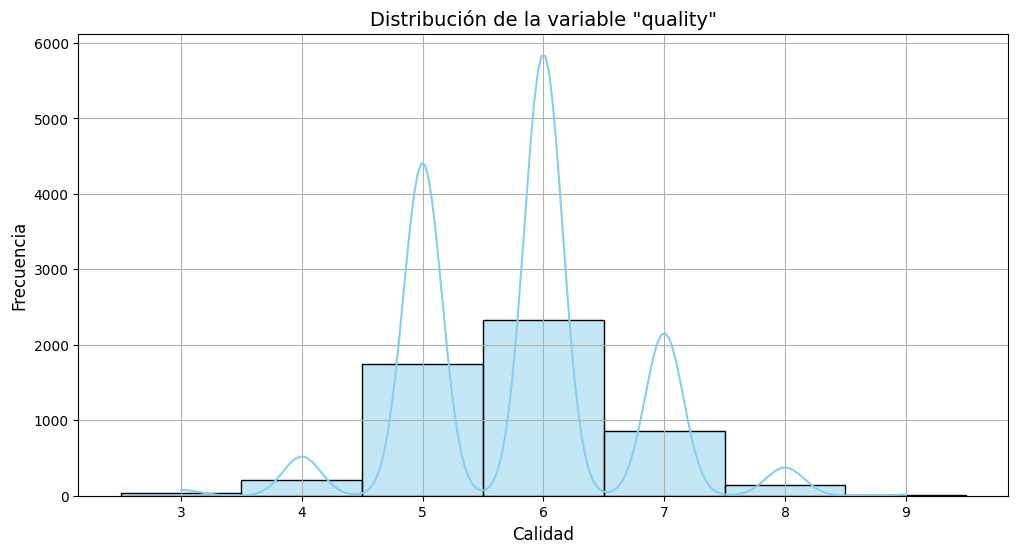

In [46]:
# Histograma: Distribución de Calidad

plt.figure(figsize=(12, 6))
sns.histplot(df['quality'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable "quality"', fontsize=14)
plt.xlabel('Calidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

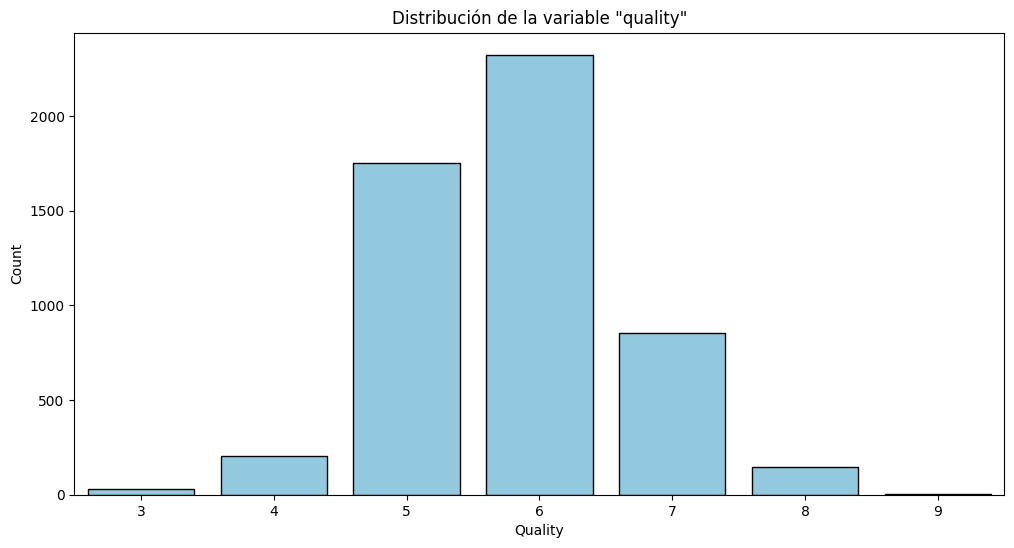

In [47]:
# Gráficos de barras: Distribución de Calidad

plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=df, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable "quality"')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

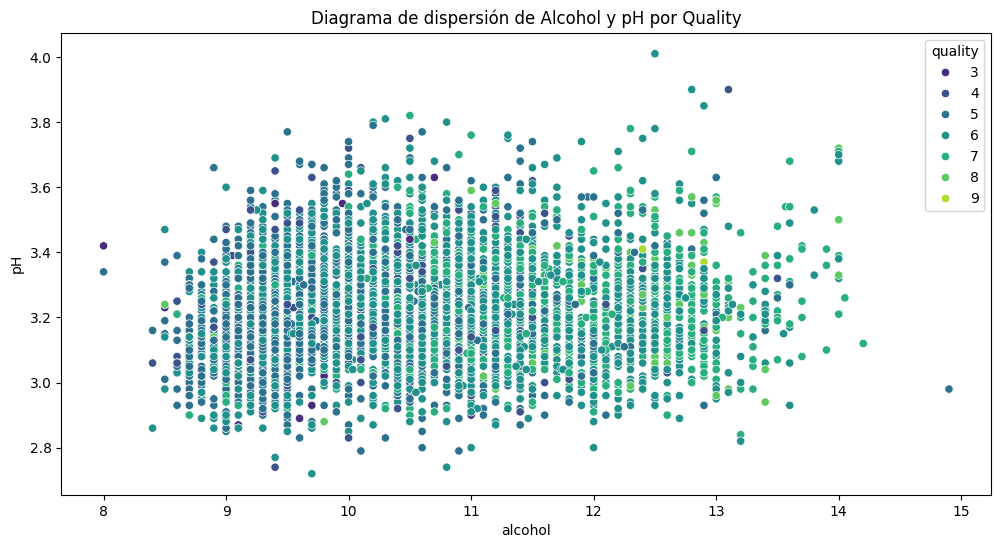

In [61]:
# Diagramas de dispersión de Calidad vs. Alcohol y pH

plt.figure(figsize=(12, 6))
sns.scatterplot(x='alcohol', y='pH', hue='quality', data=df, palette='viridis')
plt.title('Diagrama de dispersión de Alcohol y pH por Quality')
plt.show()

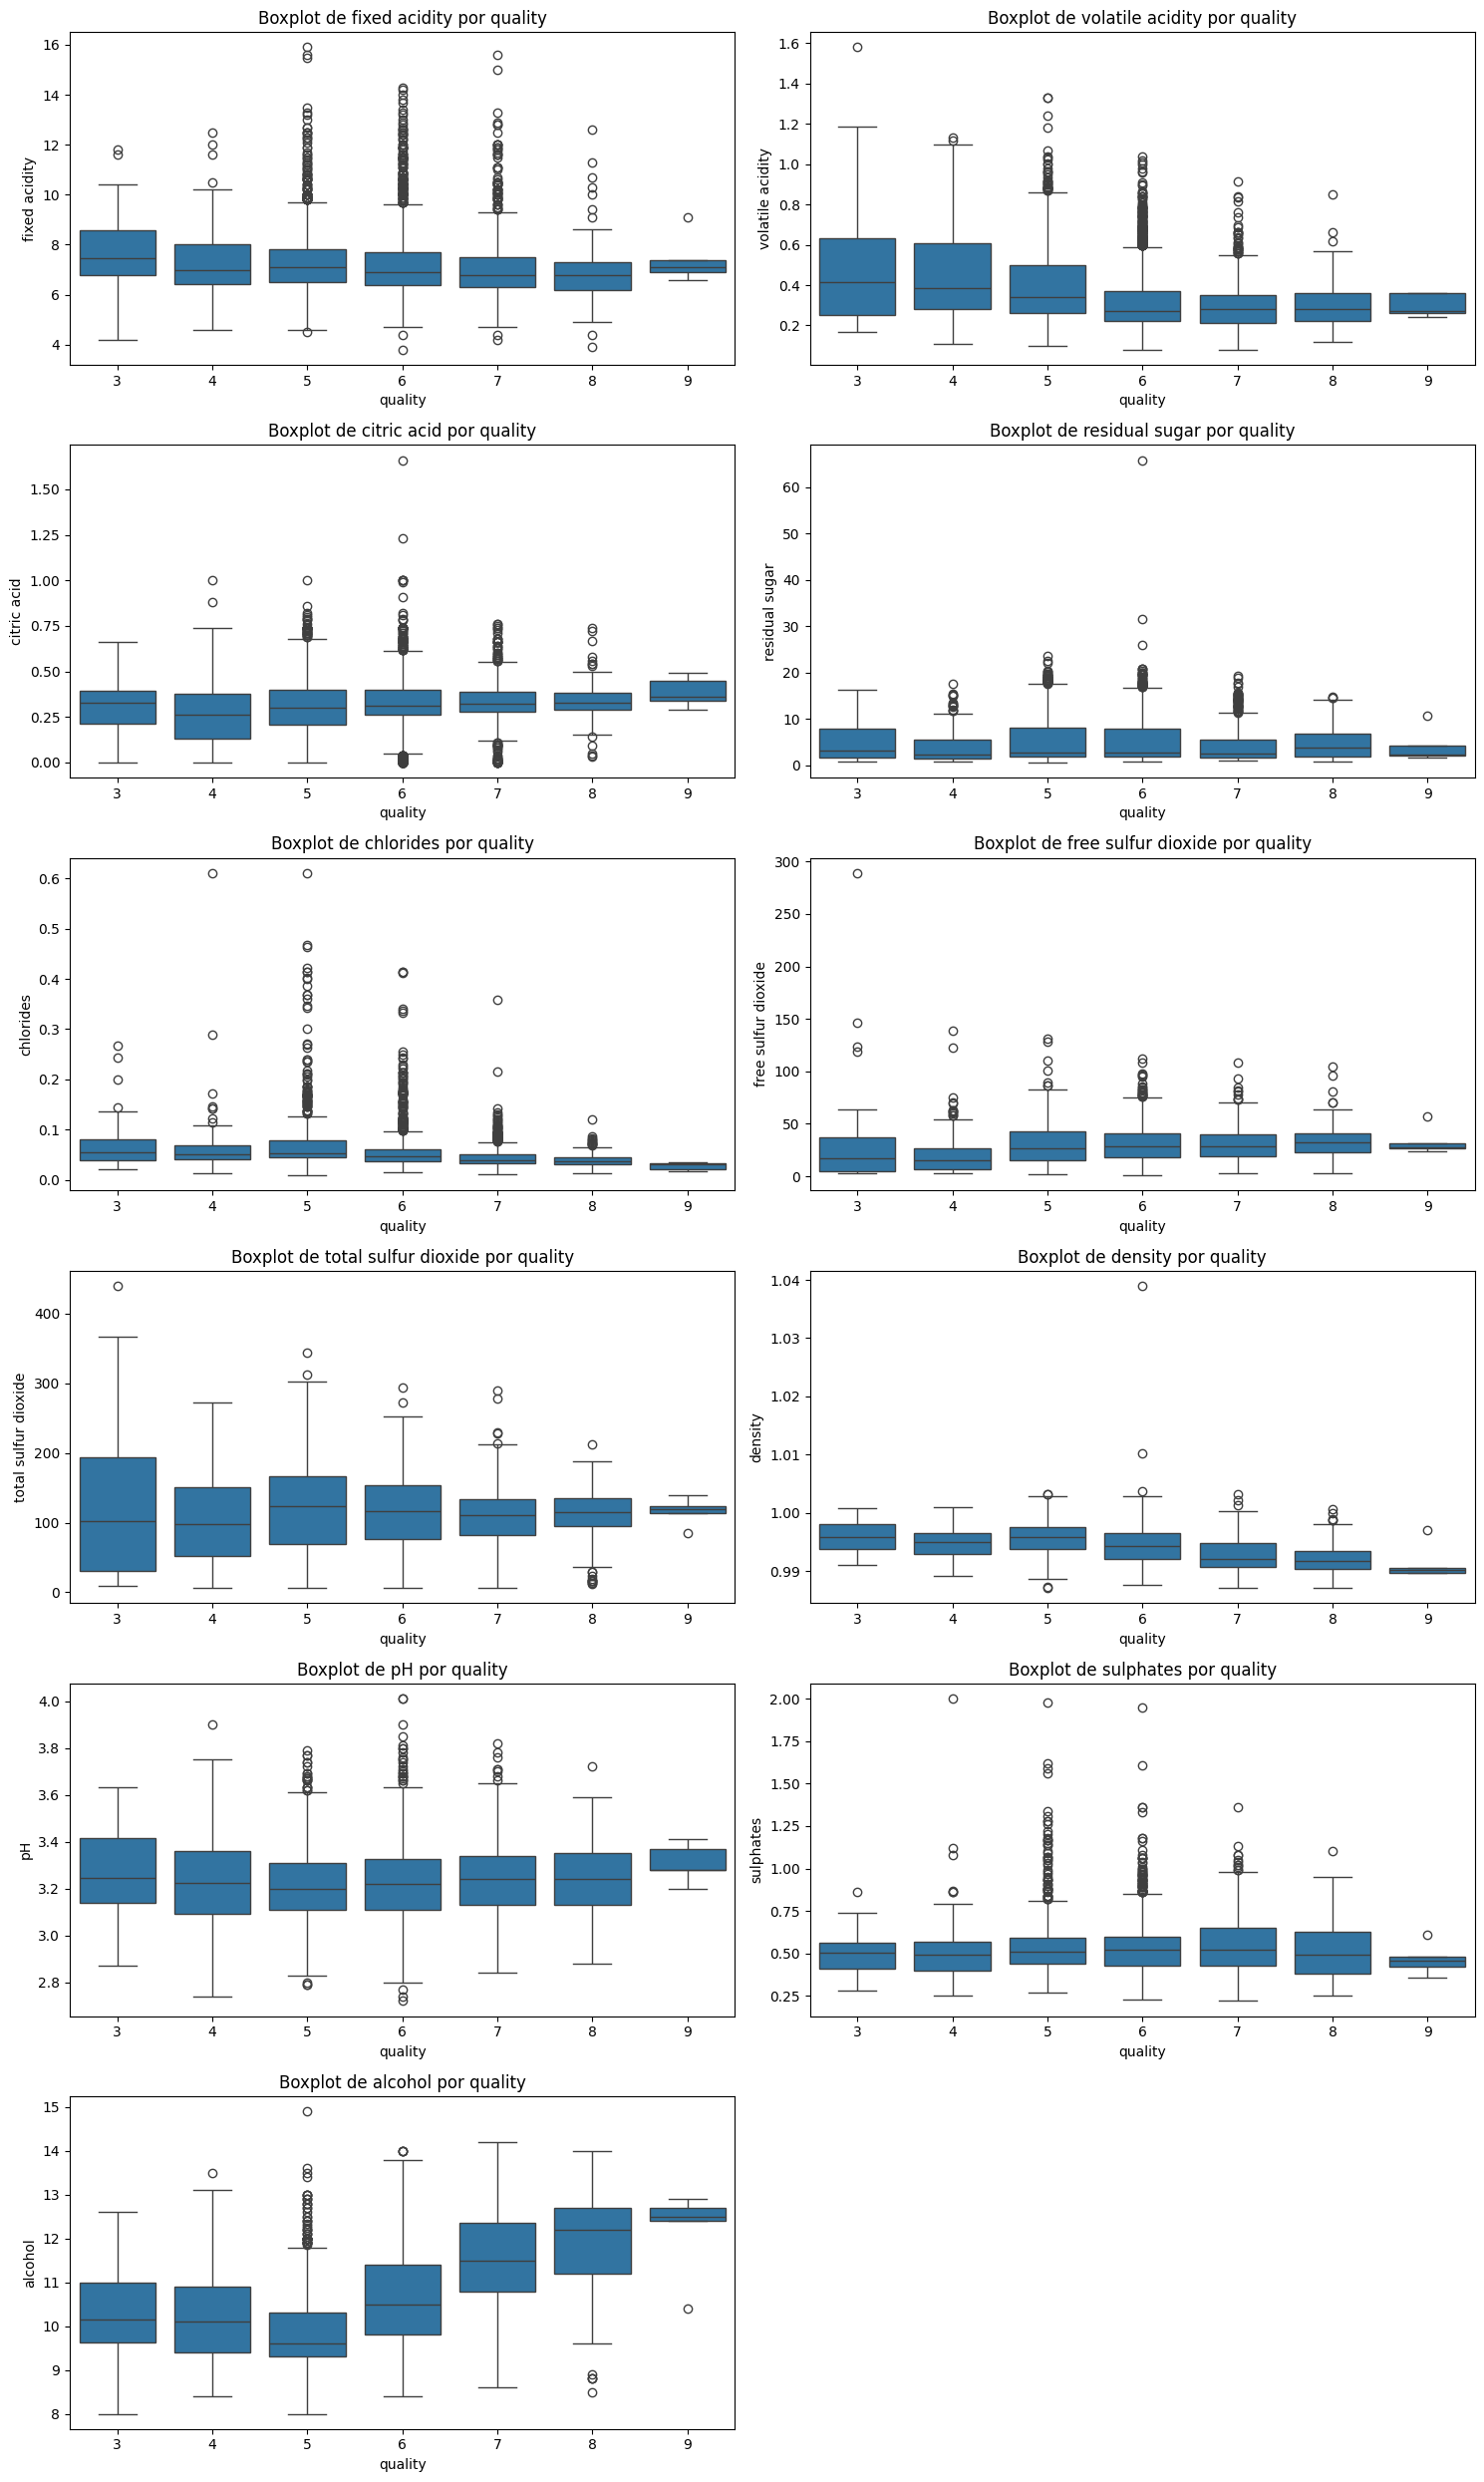

In [52]:
# Detectar outliers con boxplots para variables numéricas poy Calidad

plt.figure(figsize=(15, 25))
for i, col in enumerate(df[numerical_columns], start=1):
    plt.subplot(6, 2, i)
    sns.boxplot(x='quality', y=col, data=df)
    plt.title(f'Boxplot de {col} por quality')
plt.tight_layout()
plt.show()

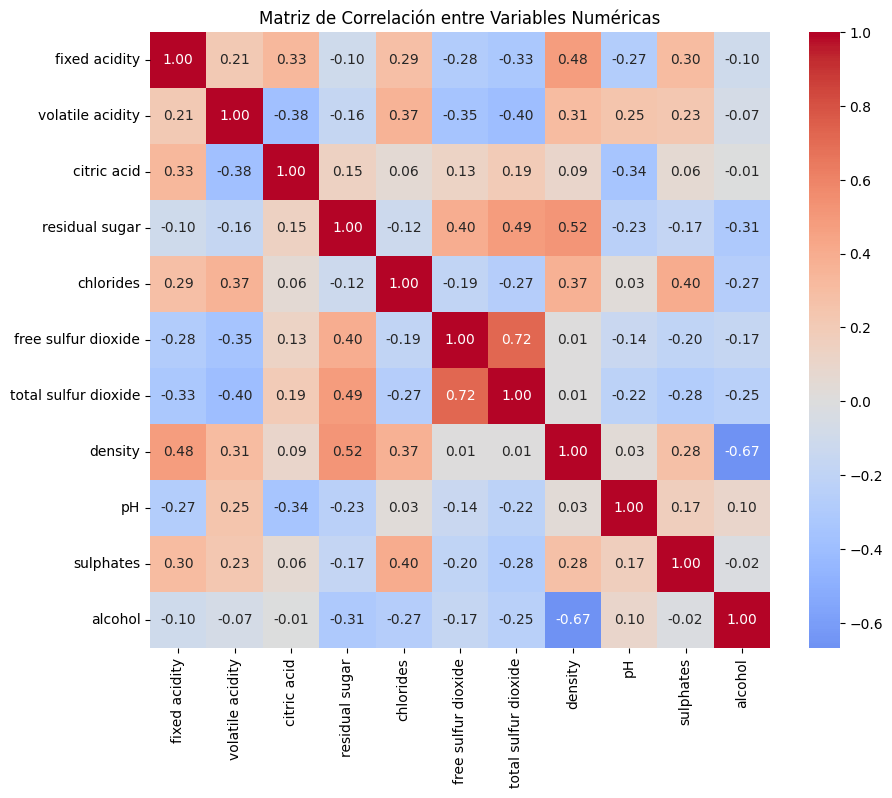

In [62]:
# Correlación de los datos numéricos

correlation_matrix = df[numerical_columns].corr()
#print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

# Estadísticas descriptivas:

In [63]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000
mean,7.215523,0.344171,0.318522,5.049605,0.056700,30.030463,114.107747,0.994536,3.224639,0.533402,10.549222
std,1.319777,0.168264,0.147177,4.500645,0.036865,17.804365,56.783848,0.002966,0.160403,0.149753,1.185964
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994660,3.210000,0.510000,10.400000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.750000,0.996770,3.330000,0.600000,11.400000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [69]:
# Calcular la moda
moda = df[numerical_columns].mode().iloc[0]

# Calcular el rango
rango = df[numerical_columns].max() - df[numerical_columns].min()

# Mostrar los resultados
print("\nMedidas de tendencia central y dispersión adicionales:")
print(f"\nModa:\n{moda}")
print(f"\nRango:\n{rango}")


Medidas de tendencia central y dispersión adicionales:

Moda:
fixed acidity             6.800
volatile acidity          0.280
citric acid               0.300
residual sugar            1.600
chlorides                 0.036
free sulfur dioxide       6.000
total sulfur dioxide    111.000
density                   0.992
pH                        3.160
sulphates                 0.500
alcohol                   9.500
Name: 0, dtype: float64

Rango:
fixed acidity            12.10000
volatile acidity          1.50000
citric acid               1.66000
residual sugar           65.20000
chlorides                 0.60200
free sulfur dioxide     288.00000
total sulfur dioxide    434.00000
density                   0.05187
pH                        1.29000
sulphates                 1.78000
alcohol                   6.90000
dtype: float64


----------------------------------------------
# **Paso 3 - Implementación de Modelos:**
----------------------------------------------

# Modelado Transformado

In [128]:
# Valores cero del DF
print((df == 0).sum())

fixed acidity             0
volatile acidity          0
citric acid             136
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


In [129]:
# División en conjuntos de entrenamiento y prueba
X = df.drop('quality', axis=1)
y = df['quality']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")

Tamaño del conjunto de entrenamiento: 3190
Tamaño del conjunto de validación: 1064
Tamaño del conjunto de prueba: 1064


In [130]:
# Reemplazar ceros por NaN
X_train['citric acid'] = X_train['citric acid'].replace(0, np.nan)
X_val['citric acid'] = X_val['citric acid'].replace(0, np.nan)

# Aplicar la imputación
imputer = SimpleImputer(strategy='mean')
X_train['citric acid'] = imputer.fit_transform(X_train[['citric acid']])
X_val['citric acid'] = imputer.transform(X_val[['citric acid']])

# Verificar si quedan ceros
print((X_train['citric acid']==0).sum())
print((X_val['citric acid']==0).sum())

0
0


In [131]:
# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [132]:
# Entrenar el modelo de Regresión Logística con el ajuste de pesos
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_log_reg = log_reg.predict(X_val_scaled)

# Evaluación
print("Resultados de la Regresión Logística con mejoras:")
print(classification_report(y_val, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_val, y_pred_log_reg))

Resultados de la Regresión Logística con mejoras:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        46
           5       0.58      0.60      0.59       346
           6       0.54      0.71      0.62       474
           7       0.53      0.27      0.36       162
           8       0.00      0.00      0.00        30

    accuracy                           0.56      1064
   macro avg       0.44      0.29      0.31      1064
weighted avg       0.52      0.56      0.52      1064

Accuracy: 0.556390977443609


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [133]:
# Crear y entrenar el modelo de KNN con los datos escalados
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predicciones para el conjunto de validación
y_pred_knn = knn.predict(X_val_scaled)

# Evaluar el rendimiento del modelo de KNN
print("\nResultados de K-Nearest Neighbors:")
print(classification_report(y_val, y_pred_knn))
print("Accuracy:", accuracy_score(y_val, y_pred_knn))


Resultados de K-Nearest Neighbors:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.29      0.13      0.18        46
           5       0.52      0.59      0.55       346
           6       0.54      0.60      0.57       474
           7       0.46      0.34      0.39       162
           8       0.20      0.03      0.06        30

    accuracy                           0.52      1064
   macro avg       0.50      0.31      0.34      1064
weighted avg       0.50      0.52      0.50      1064

Accuracy: 0.5169172932330827


***- Validación cruzada***

In [134]:
# Validación cruzada para Regresión Logística
scores_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Validación cruzada de Regresión Logística (Accuracy):")
print("Scores:", scores_log_reg)
print("Promedio de Accuracy:", scores_log_reg.mean())

# Validación cruzada para KNN
scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("\nValidación cruzada de K-Nearest Neighbors (Accuracy):")
print("Scores:", scores_knn)
print("Promedio de Accuracy:", scores_knn.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Validación cruzada de Regresión Logística (Accuracy):
Scores: [0.52978056 0.53761755 0.54075235 0.54075235 0.55956113]
Promedio de Accuracy: 0.541692789968652


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Validación cruzada de K-Nearest Neighbors (Accuracy):
Scores: [0.51880878 0.5        0.49373041 0.49059561 0.49059561]
Promedio de Accuracy: 0.4987460815047021


***- Prueba***

In [135]:
# Escalar el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Predicciones para el conjunto de prueba con Regresión Logística
y_test_pred_log_reg = log_reg.predict(X_test_scaled)
print("\nResultados de la Regresión Logística en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred_log_reg))
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_test_pred_log_reg))

# Predicciones para el conjunto de prueba con KNN
y_test_pred_knn = knn.predict(X_test_scaled)
print("\nResultados de K-Nearest Neighbors en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred_knn))
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_test_pred_knn))


Resultados de la Regresión Logística en el conjunto de prueba:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       1.00      0.03      0.06        35
           5       0.58      0.61      0.60       344
           6       0.51      0.66      0.58       471
           7       0.52      0.28      0.36       180
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1064
   macro avg       0.37      0.23      0.23      1064
weighted avg       0.54      0.54      0.51      1064

Accuracy en el conjunto de prueba: 0.5385338345864662

Resultados de K-Nearest Neighbors en el conjunto de prueba:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.44      0.20      0.27        35
           5       0.56      0.62      0.59       344
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

# Modelado datos Original

In [125]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns = 'quality')
y = df['quality']

# Dividir los datos en conjunto de entrenamiento (70%) y de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=73, stratify=y)
print(y_test.value_counts())
print(y_train.value_counts())

quality
6    697
5    525
7    257
4     62
8     44
3      9
9      2
Name: count, dtype: int64
quality
6    1626
5    1226
7     598
4     144
8     104
3      21
9       3
Name: count, dtype: int64


**- Regresión Logistica**

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Entrenar modelo de Regresión Logística sin escalado
logreg = LogisticRegression(random_state=42, max_iter=500, solver='lbfgs')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluar Regresión Logística
print("Evaluación de Regresión Logística sin escalado:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_logreg, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_logreg))

Evaluación de Regresión Logística sin escalado:
Accuracy: 0.5375939849624061
Precision: 0.4909559701301995
Recall: 0.5375939849624061
F1-score: 0.49943948073519595
Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        62
           5       0.60      0.60      0.60       525
           6       0.52      0.71      0.60       697
           7       0.43      0.18      0.25       257
           8       0.00      0.00      0.00        44
           9       0.00      0.00      0.00         2

    accuracy                           0.54      1596
   macro avg       0.22      0.21      0.21      1596
weighted avg       0.49      0.54      0.50      1596



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

**- KNN**

In [122]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar modelo K-Nearest Neighbors (KNN) sin escalado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluar KNN
print("\nEvaluación de KNN sin escalado:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_knn, average='weighted'))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_knn))


Evaluación de KNN sin escalado:
Accuracy: 0.4928205128205128
Precision: 0.4786746964538701
Recall: 0.49282051282051276
F1-score: 0.4800282024659114
Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.19      0.09      0.12        65
           5       0.48      0.55      0.51       642
           6       0.53      0.59      0.56       851
           7       0.44      0.30      0.35       324
           8       0.32      0.12      0.17        58
           9       0.00      0.00      0.00         1

    accuracy                           0.49      1950
   macro avg       0.28      0.24      0.25      1950
weighted avg       0.48      0.49      0.48      1950



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [123]:
# Comparación y discusión
if accuracy_score(y_test, y_pred_logreg) > accuracy_score(y_test, y_pred_knn):
    print("\nLa Regresión Logística tiene un mejor rendimiento en términos de accuracy.")
else:
    print("\nEl modelo K-Nearest Neighbors (KNN) tiene un mejor rendimiento en términos de accuracy.")

# Comparación de F1-score para ver cuál es más balanceado
if f1_score(y_test, y_pred_logreg, average='weighted') > f1_score(y_test, y_pred_knn, average='weighted'):
    print("La Regresión Logística tiene un mejor F1-score y es más balanceada en general.")
else:
    print("El modelo KNN tiene un mejor F1-score y es más balanceado en general.")


La Regresión Logística tiene un mejor rendimiento en términos de accuracy.
La Regresión Logística tiene un mejor F1-score y es más balanceada en general.
